#Liberaries


In [ ]:
# necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import pickle

#preprossing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
#Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#evaluate model
from sklearn.metrics import (confusion_matrix,classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             log_loss, balanced_accuracy_score, matthews_corrcoef,
                             cohen_kappa_score, fbeta_score, hamming_loss,
                             jaccard_score, brier_score_loss)
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, make_scorer
from IPython.core.debugger import set_trace

import warnings
warnings.filterwarnings('ignore')

#Load Data

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ASD/Detect_Children/Autism-Child-Data.csv',index_col=False)
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


#DataPreprossing

In [ ]:
# Verify column names
print("Column names:", data.columns)
data.info()
data.shape

Column names: Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'autism', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         292 non-null    int64 
 1   A2_Score         292 non-null    int64 
 2   A3_Score         292 non-null    int64 
 3   A4_Score         292 non-null    int64 
 4   A5_Score         292 non-null    int64 
 5   A6_Score         292 non-null    int64 
 6   A7_Score         292 non-null    int64 
 7   A8_Score         292 non-null    int64 
 8   A9_Score         292 non-null    int64 
 9   A10_Score        292 non-null    int64 
 10  age              292 non-null 

(292, 21)

In [ ]:
data = data.drop(['result', 'age_desc'], axis=1)

In [ ]:
data = data.rename(columns={'Class/ASD': 'ASD'})

In [ ]:
data.duplicated().sum()

2

In [ ]:
# data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()


2

In [ ]:
data.shape

(292, 19)

In [ ]:
# Function to find columns with a specific value
def get_columns_with_value(df, value):
    columns_with_value = [col for col in df.columns if df[col].eq(value).any()]
    return columns_with_value

# Get columns that contain the value '?'
columns_with_value = get_columns_with_value(data, '?')
print("\nColumns that contain the value '?':")
print(columns_with_value)



Columns that contain the value '?':
['age', 'ethnicity', 'relation']


In [ ]:
# Replace specific data in specific columns with empty strings
value_to_replace = '?'  # Value to replace
columns_to_replace_in = ['age', 'ethnicity', 'relation']  # Replace with actual column names you want to replace in

# Replace the specific value with an empty string in the specified columns
for column in columns_to_replace_in:
    data.loc[data[column] == value_to_replace, column] = ''

In [ ]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism,contry_of_res,used_app_before,relation,ASD
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,no,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,'Middle Eastern ',no,no,Jordan,no,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,,no,no,Jordan,yes,,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,,yes,no,Jordan,no,,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,'United States',no,Parent,YES


In [ ]:
data.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
#Making classes of categorical variables same for all datasets
data["relation"] = data["relation"].replace('self','Self')

In [ ]:
data['contry_of_res']

,contry_of_res
0,Jordan
1,Jordan
2,Jordan
3,Jordan
4,'United States'
...,...
287,'United Kingdom'
288,Australia
289,Brazil
290,India


In [ ]:
data['contry_of_res'] = data['contry_of_res'].str.replace(r'[\'"]', '', regex=True).str.replace(' ','')
data['contry_of_res']

,contry_of_res
0,Jordan
1,Jordan
2,Jordan
3,Jordan
4,UnitedStates
...,...
287,UnitedKingdom
288,Australia
289,Brazil
290,India


In [ ]:
# data['ASD']= data['ASD'].replace('YES','1',inplace=True)
data.loc[data['ASD'] == 'YES', 'ASD']=1
data.loc[data['ASD'] == 'NO', 'ASD']=0
data['ASD']= pd.to_numeric(data['ASD'])
data['ASD']

,ASD
0,0
1,0
2,0
3,0
4,1
...,...
287,1
288,0
289,1
290,1


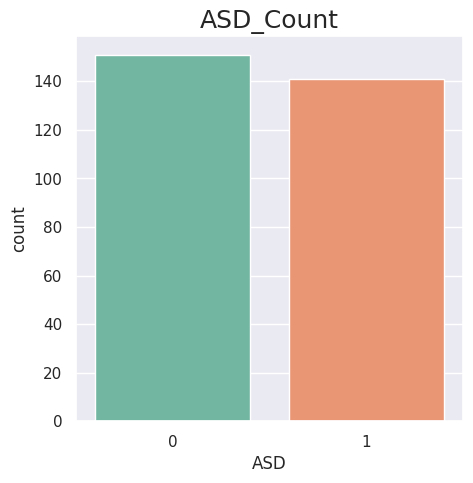

,count
ASD,
0,151
1,141


In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='ASD', data=data,palette='Set2')
plt.title('ASD_Count', fontsize=18)
plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/Features_figs/ASD_count.png')
plt.show()
data['ASD'].value_counts()

In [ ]:
#get numeric data properities
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,ASD
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,0.482877
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,0.500565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#get categorical data properities
data.describe(include='O')

,age,gender,ethnicity,jundice,autism,contry_of_res,used_app_before,relation
count,292,292,292,292,292,292,292,292
unique,9,2,11,2,2,52,2,5
top,4,m,White-European,no,no,UnitedKingdom,no,Parent
freq,92,208,108,212,243,49,281,214


In [ ]:
data.isnull().sum().sum()

0

#Features(X)and target(Y)

In [ ]:
# Split features and target
X = data.drop(columns=['ASD'])
y = data['ASD']


In [ ]:
X.shape

(292, 18)

In [ ]:
y.shape

(292,)

In [ ]:
numerical_data=X.select_dtypes(include=[np.number]).columns
numerical_data

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score'],
      dtype='object')

In [ ]:
categorical_data=X.select_dtypes(include=[object]).columns
categorical_data

Index(['age', 'gender', 'ethnicity', 'jundice', 'autism', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [ ]:
# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
data[numerical_data] = numeric_imputer.fit_transform(data[numerical_data])

# Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_data] = categorical_imputer.fit_transform(data[categorical_data])

# Display the modified DataFrame with the original headers
print("\nDataFrame after imputing missing values:")
print(data.head())


DataFrame after imputing missing values:
   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0       1.0       1.0       0.0       0.0       1.0       1.0       0.0   
1       1.0       1.0       0.0       0.0       1.0       1.0       0.0   
2       1.0       1.0       0.0       0.0       0.0       1.0       1.0   
3       0.0       1.0       0.0       0.0       1.0       1.0       0.0   
4       1.0       1.0       1.0       1.0       1.0       1.0       1.0   

   A8_Score  A9_Score  A10_Score age gender          ethnicity jundice autism  \
0       1.0       0.0        0.0   6      m             Others      no     no   
1       1.0       0.0        0.0   6      m  'Middle Eastern '      no     no   
2       1.0       0.0        0.0   6      m                         no     no   
3       0.0       0.0        1.0   5      f                        yes     no   
4       1.0       1.0        1.0   5      m             Others     yes     no   

  contry_of_res used

In [ ]:
data.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
# Print the name of each feature
print("Feature names:")
for i, feature in enumerate(X.columns, start=1):
    print(f'X{i-1} is {feature}')

Feature names:
X0 is A1_Score
X1 is A2_Score
X2 is A3_Score
X3 is A4_Score
X4 is A5_Score
X5 is A6_Score
X6 is A7_Score
X7 is A8_Score
X8 is A9_Score
X9 is A10_Score
X10 is age
X11 is gender
X12 is ethnicity
X13 is jundice
X14 is autism
X15 is contry_of_res
X16 is used_app_before
X17 is relation


In [ ]:
copy_X=X

In [ ]:
#Data Encoder
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        self.encoders = {col: LabelEncoder().fit(X[col]) for col in self.columns}
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = self.encoders[col].transform(X_copy[col])
        return X_copy

# Apply the custom encoder
mcle = MultiColumnLabelEncoder(columns=['age', 'gender', 'ethnicity', 'jundice', 'autism', 'contry_of_res',
       'used_app_before', 'relation'])

X_label_encoded = mcle.fit_transform(copy_X)
print(X_label_encoded)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         0         0         1         1         0   
1           1         1         0         0         1         1         0   
2           1         1         0         0         0         1         1   
3           0         1         0         0         1         1         0   
4           1         1         1         1         1         1         1   
..        ...       ...       ...       ...       ...       ...       ...   
287         1         1         1         1         1         1         1   
288         1         0         0         0         1         0         1   
289         1         0         1         1         1         1         1   
290         1         1         1         0         1         1         1   
291         0         0         1         0         1         0         1   

     A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jundice  autism

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label_encoded)
X_scaled

array([[ 0.76051192,  0.93369956, -1.70098011, ..., -0.37107938,
        -0.19785325,  0.29482457],
       [ 0.76051192,  0.93369956, -1.70098011, ..., -0.37107938,
        -0.19785325,  0.29482457],
       [ 0.76051192,  0.93369956, -1.70098011, ..., -0.37107938,
         5.05425114, -2.0965303 ],
       ...,
       [ 0.76051192, -1.07100832,  0.58789635, ..., -1.28498706,
        -0.19785325,  0.29482457],
       [ 0.76051192,  0.93369956,  0.58789635, ..., -0.71379476,
        -0.19785325,  0.29482457],
       [-1.31490378, -1.07100832,  0.58789635, ..., -0.71379476,
        -0.19785325,  0.29482457]])

#Feature Engineering

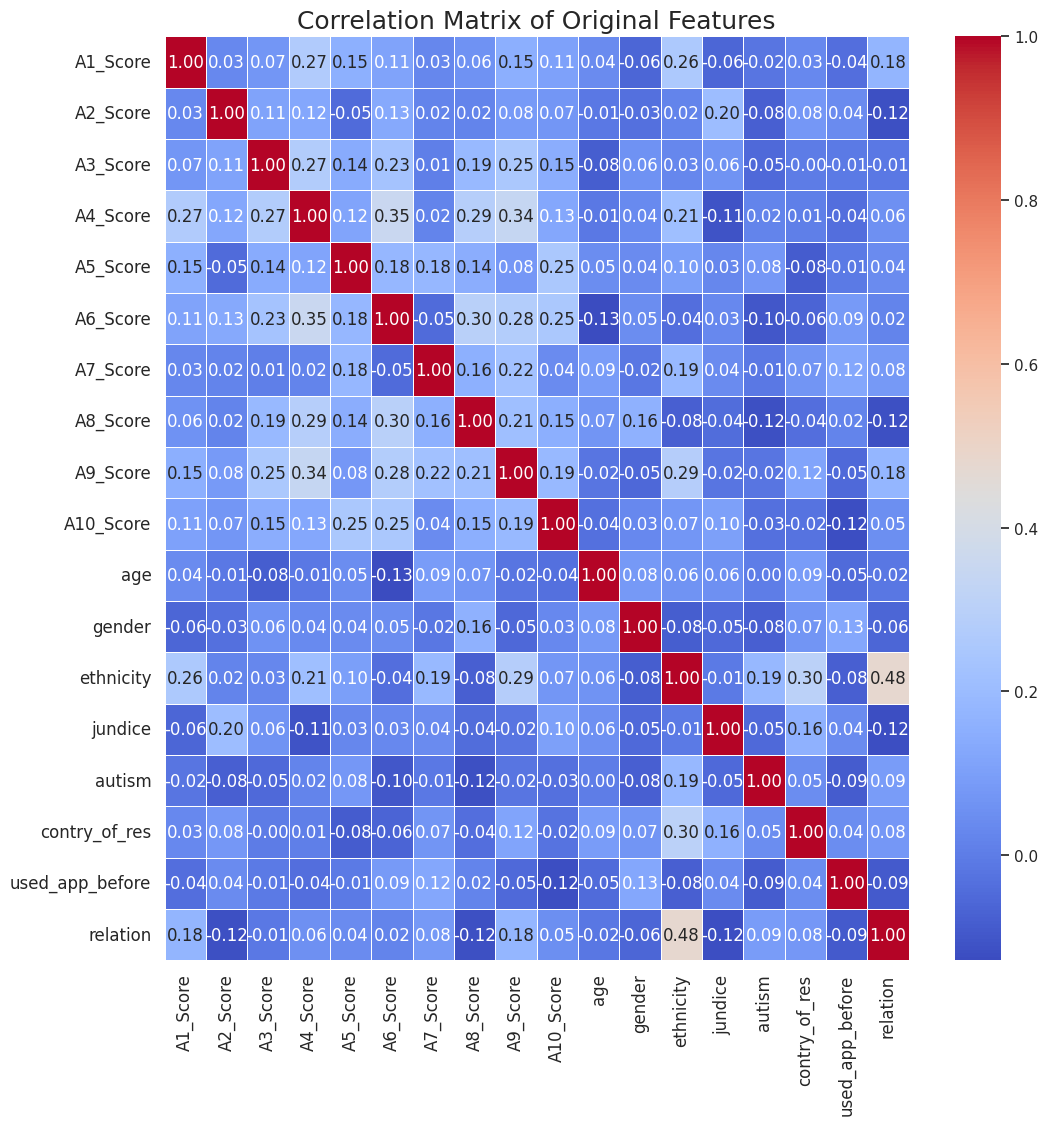

In [ ]:
# Correlation matrix for original features (X_label_encoded)
plt.figure(figsize=(12, 12))
corr_matrix = X_label_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
plt.title('Correlation Matrix of Original Features', fontsize=18)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/Features_figs/original_features_correlation_matrix.png')
plt.show()

In [ ]:
# Feature engineering (e.g., adding polynomial features)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_poly

array([[  1.        ,   0.76051192,   0.93369956, ...,   0.07341926,
         -0.10940332,  -0.058332  ],
       [  1.        ,   0.76051192,   0.93369956, ...,   0.07341926,
         -0.10940332,  -0.058332  ],
       [  1.        ,   0.76051192,   0.93369956, ...,  -1.87552838,
          0.77797916, -10.59639065],
       ...,
       [  1.        ,   0.76051192,  -1.07100832, ...,   0.25423886,
         -0.37884576,  -0.058332  ],
       [  1.        ,   0.76051192,   0.93369956, ...,   0.14122661,
         -0.21044424,  -0.058332  ],
       [  1.        ,  -1.31490378,  -1.07100832, ...,   0.14122661,
         -0.21044424,  -0.058332  ]])

In [ ]:
# Plot Correlation after Polynomial Feature Expansion (X_poly)
X_poly_df = pd.DataFrame(X_poly)
plt.figure(figsize=(50, 45))
sns.heatmap(X_poly_df.corr(), annot=True, cmap='coolwarm',fmt='.1f',linewidth=.5)
plt.title('Correlation Matrix After Polynomial Feature Expansion',fontsize=20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/Features_figs/polynomial features_correlation_matrix.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Feature reduction based on correlation threshold
# Assuming X_poly_df is your DataFrame
threshold = 0.9  # Set your desired correlation threshold

# Calculate the correlation matrix
corr_matrix = X_poly_df.corr()
upper_triangle = np.triu(corr_matrix, k=1)  # Get upper triangle of correlation matrix

# Identify columns to drop based on threshold
high_corr_features = [i for i in range(len(X_poly_df.columns)) if any(np.abs(upper_triangle[:, i]) > threshold)]

# Drop the highly correlated columns
X_poly_reduced = X_poly_df.drop(columns=high_corr_features)


# Correlation matrix After Feature Reduction
# Assuming X_poly_reduced is your DataFrame after reduction
plt.figure(figsize=(50, 45))
corr_matrix1 = X_poly_reduced.corr()
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.7)
plt.title('Correlation Matrix After Feature Reduction', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/Features_figs/Feature Reduction_correlation_matrix.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Data augmentation


In [ ]:
X_poly_reduced.shape

(292, 169)

In [ ]:
# Data augmentation by adding noise
def add_noise(X, noise_level=0.01):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

# Augment the data
X_augmented = add_noise(X_poly_reduced, noise_level=0.01)
X_augmented.shape

# Integrate original and augmented data
X_combined = np.concatenate((X_poly_reduced, X_augmented))
y_combined = np.concatenate((y, y))

print("X_poly_reduced shape:", X_poly_reduced.shape)
print("X_augmented shape:", X_augmented.shape)
print("y shape:", y.shape)

print("X_combined shape:", X_combined.shape)
print("y_combined shape:", y_combined.shape)

X_poly_reduced shape: (292, 169)
X_augmented shape: (292, 169)
y shape: (292,)
X_combined shape: (584, 169)
y_combined shape: (584,)


#Feature selection

In [ ]:
# Feature selection
k_best = SelectKBest(score_func=f_regression, k=30)

# Verify column names
print("K_best Scores before polynomial:", k_best)


K_best Scores before polynomial: SelectKBest(k=30, score_func=<function f_regression at 0x7b1fa0bd6840>)


In [ ]:
X_selected = k_best.fit_transform(X_combined, y_combined)
X_selected


array([[ 0.76051192,  0.93369956, -1.70098011, ...,  0.26433637,
        -0.23581683, -0.10940332],
       [ 0.76051192,  0.93369956, -1.70098011, ..., -0.68857993,
        -0.23581683, -0.10940332],
       [ 0.76051192,  0.93369956, -1.70098011, ..., -0.84739931,
        -0.23581683,  0.77797916],
       ...,
       [ 0.74994563, -1.05967015,  0.59303657, ...,  0.10506741,
        -0.82277107, -0.36573701],
       [ 0.7635289 ,  0.9422142 ,  0.58194812, ..., -0.50805109,
        -0.44958126, -0.23468117],
       [-1.31970012, -1.06861168,  0.58897362, ...,  1.32240069,
         1.11319203, -0.20223053]])

In [ ]:
# Finding the optimal value of k
def find_best_k(X, y, max_k=30):
    best_k = 1
    best_score = -np.inf
    scores = []

    for k in range(1, max_k+1):
        k_best = SelectKBest(score_func=f_regression, k=k)
        X_selected = k_best.fit_transform(X, y)

        # Using cross-validation to evaluate the performance of the selected features
        score = cross_val_score(RandomForestRegressor(), X_selected, y, cv=5, scoring='r2').mean()
        scores.append(score)

        if score > best_score:
            best_score = score
            best_k = k

    return best_k, scores

best_k, scores = find_best_k(X_combined, y_combined)

print(f'Optimal number of features: {best_k}')


Optimal number of features: 25


In [ ]:
# Feature selection with optimal k
k_best = SelectKBest(score_func=f_regression, k=best_k)
X_selected = k_best.fit_transform(X_combined, y_combined)

# Get selected feature names
feature_names = poly.get_feature_names_out(X.columns)
selected_features = [feature_names[i] for i in k_best.get_support(indices=True)]

print('Selected Features:', selected_features)

Selected Features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'ethnicity', 'A1_Score A3_Score', 'A2_Score A9_Score', 'A2_Score autism', 'A5_Score A9_Score', 'A5_Score jundice', 'A5_Score contry_of_res', 'A6_Score age', 'A7_Score ethnicity', 'A7_Score used_app_before', 'A8_Score contry_of_res', 'A8_Score used_app_before', 'A10_Score autism', 'gender autism', 'autism used_app_before']


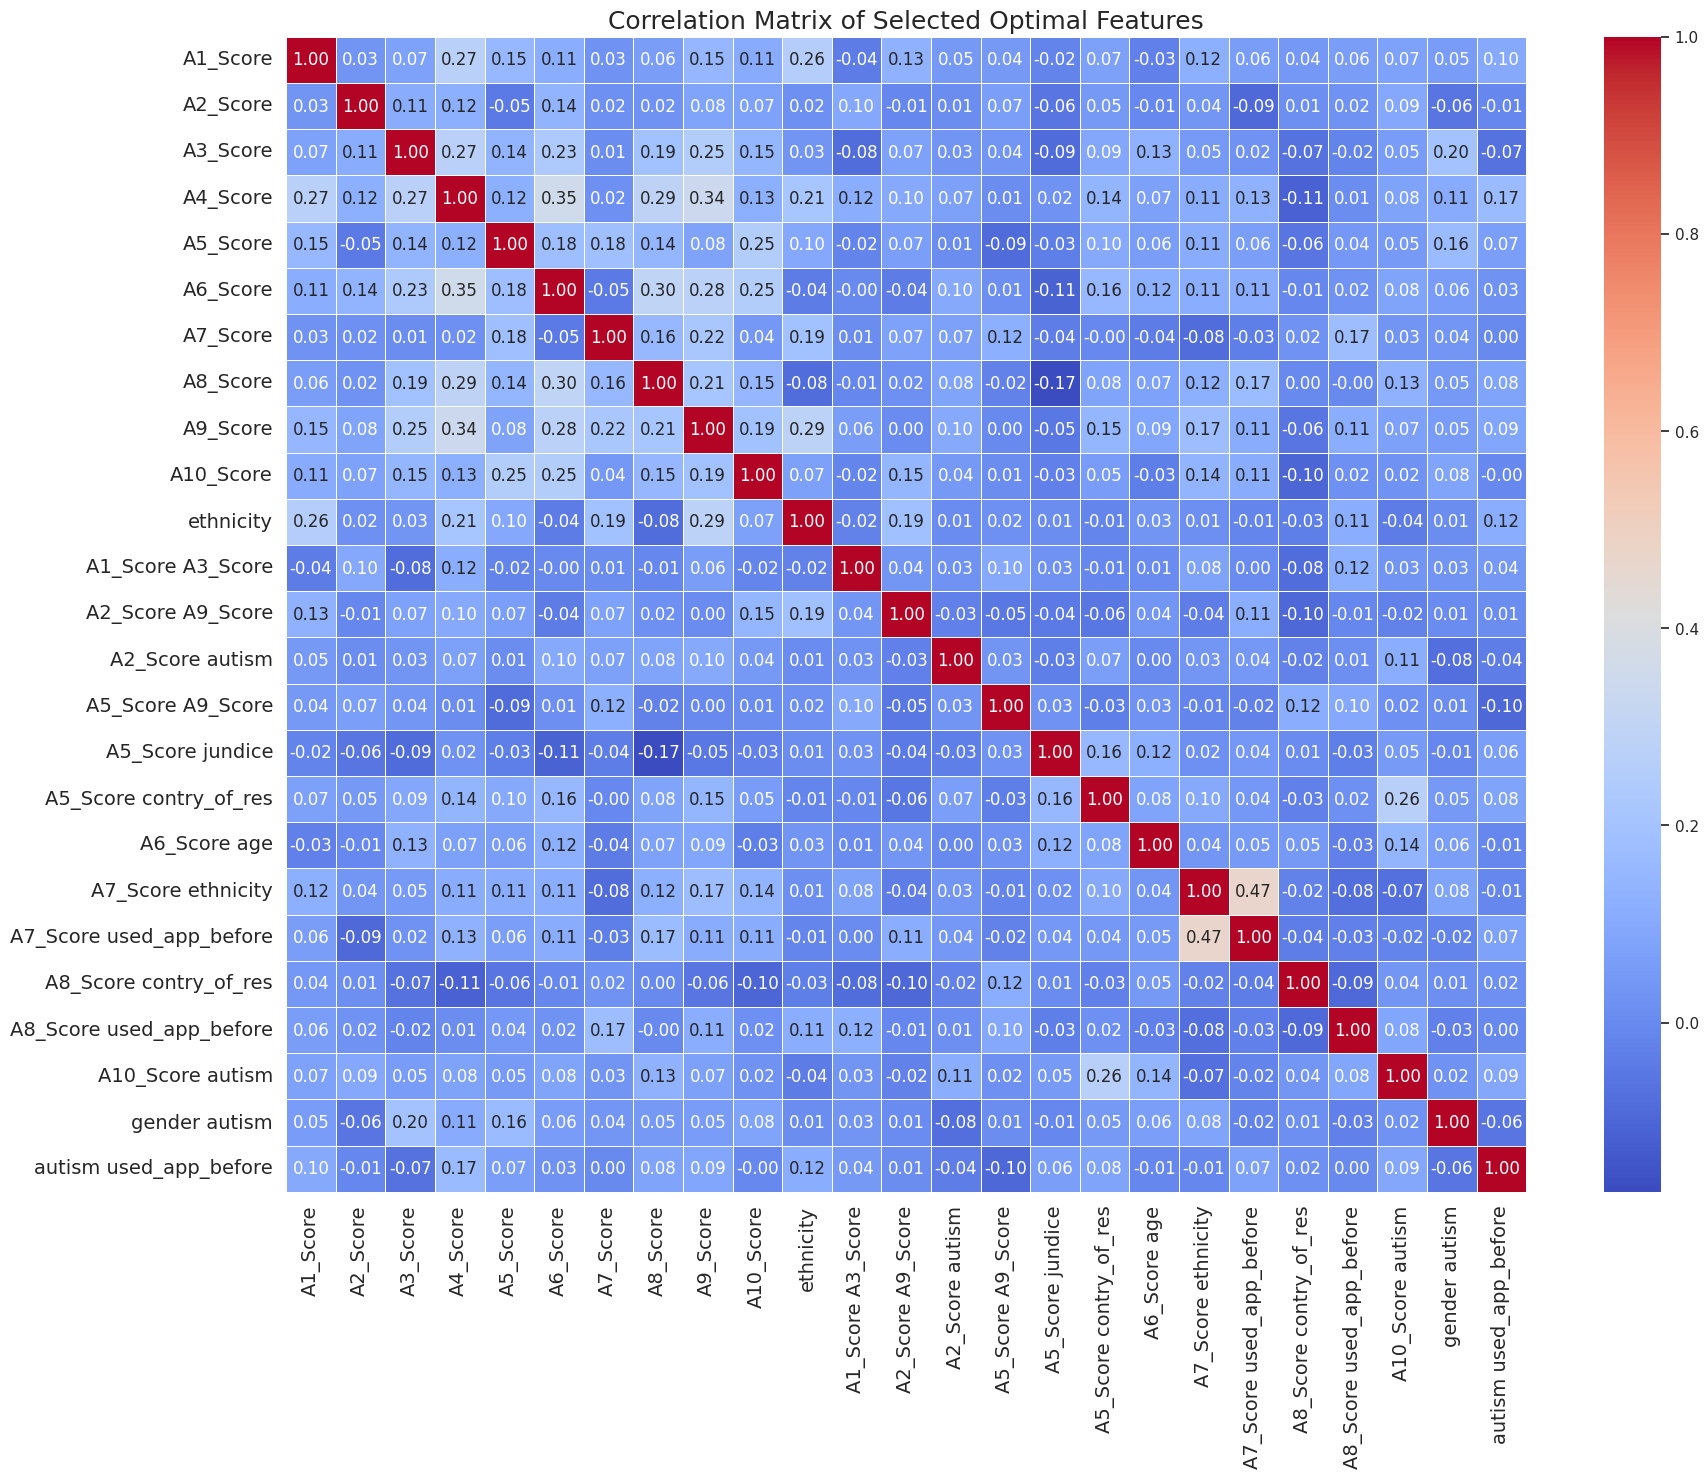

In [ ]:
# Assuming the selected features are from the original dataset, we need to extract these from X_combined
selected_feature_indices = k_best.get_support(indices=True)

# Create a DataFrame for the selected features
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
selected_features_df = pd.DataFrame(X_combined[:, selected_feature_indices], columns=selected_feature_names)

# Draw the correlation matrix of the selected features
plt.figure(figsize=(20, 15))
selected_corr_matrix = selected_features_df.corr()
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
plt.title('Correlation Matrix of Selected Optimal Features', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/Features_figs/selected_features_correlation_matrix.png')
plt.show()

# Save DataFrame to Excel
selected_features_df.to_excel('/content/drive/MyDrive/ASD/Detect_Children/selected_features.xlsx', index=False)


Features Score [106.55949707  32.3317477  108.05641552 278.69588362  98.25519383
 122.75336794  47.23175899 138.58078401 179.9768311  139.33762798
  16.33919668   9.13005506   6.33342429   7.09948274  12.61733159
   6.20825981  13.4869218   10.68095697  15.81698715   8.08977642
   6.35222591   7.09819418   9.34152391   6.29986756   5.91683049]


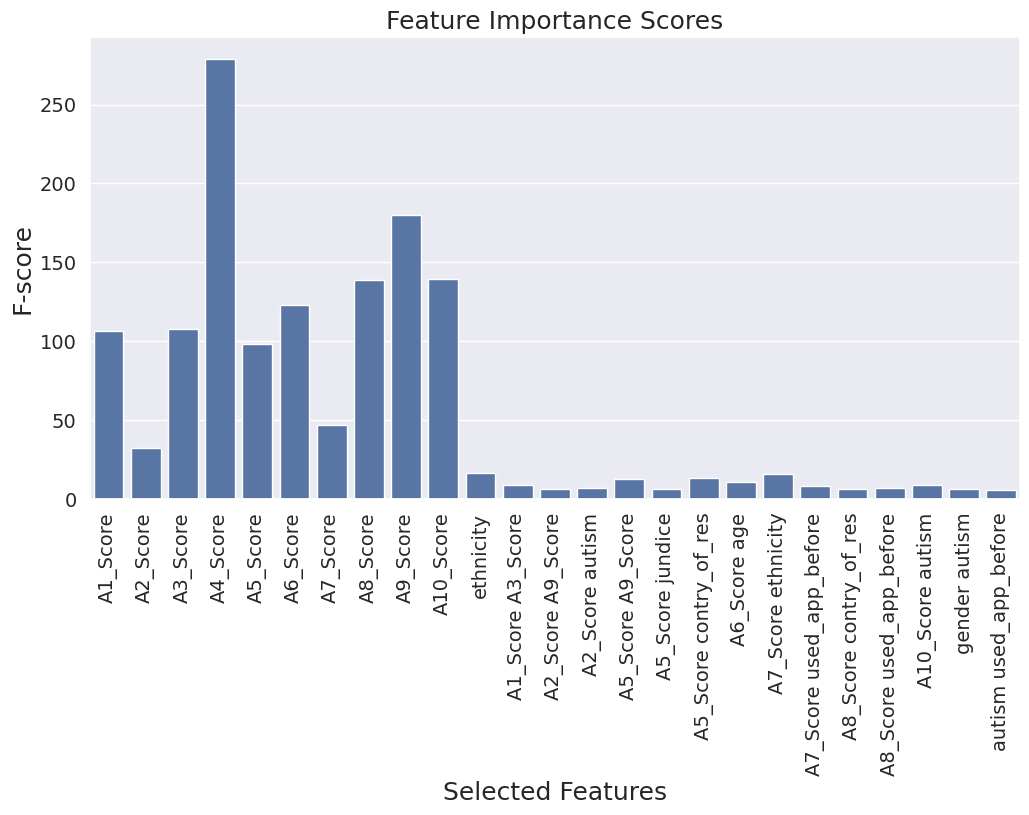

In [ ]:
# Plot feature importances
feature_scores = k_best.scores_[k_best.get_support()]
print('Features Score', feature_scores)

#draw feature_importance
plt.figure(figsize=(12, 6))
sns.barplot(x=selected_features, y=feature_scores)
plt.xlabel('Selected Features', fontsize=18)
plt.ylabel('F-score', fontsize=18)
plt.title('Feature Importance Scores', fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/Features_figs/feature_importance_scores.png')
plt.show()



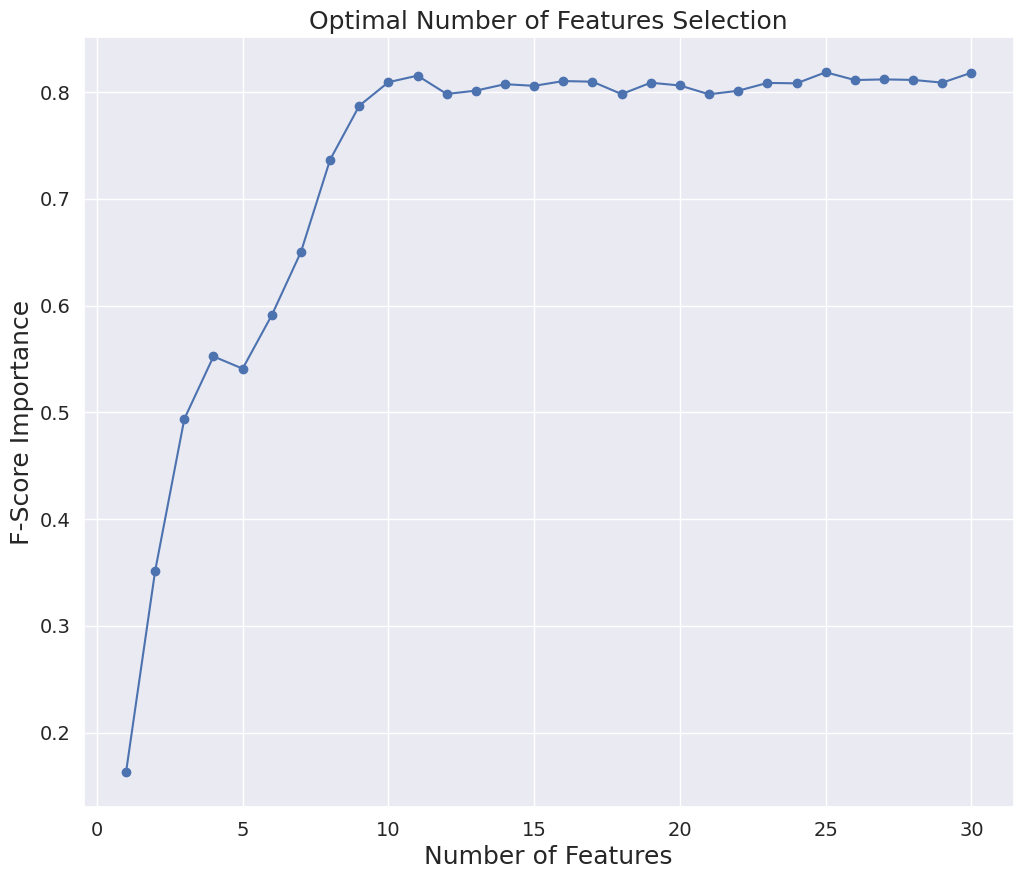

In [ ]:
# Plot the scores for different values of k
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(scores)+1), scores, marker='o')
plt.xlabel('Number of Features', fontsize=18)
plt.ylabel('F-Score Importance', fontsize=18)
plt.title('Optimal Number of Features Selection', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/Features_figs/optimal_number_of_features.png')
plt.show()


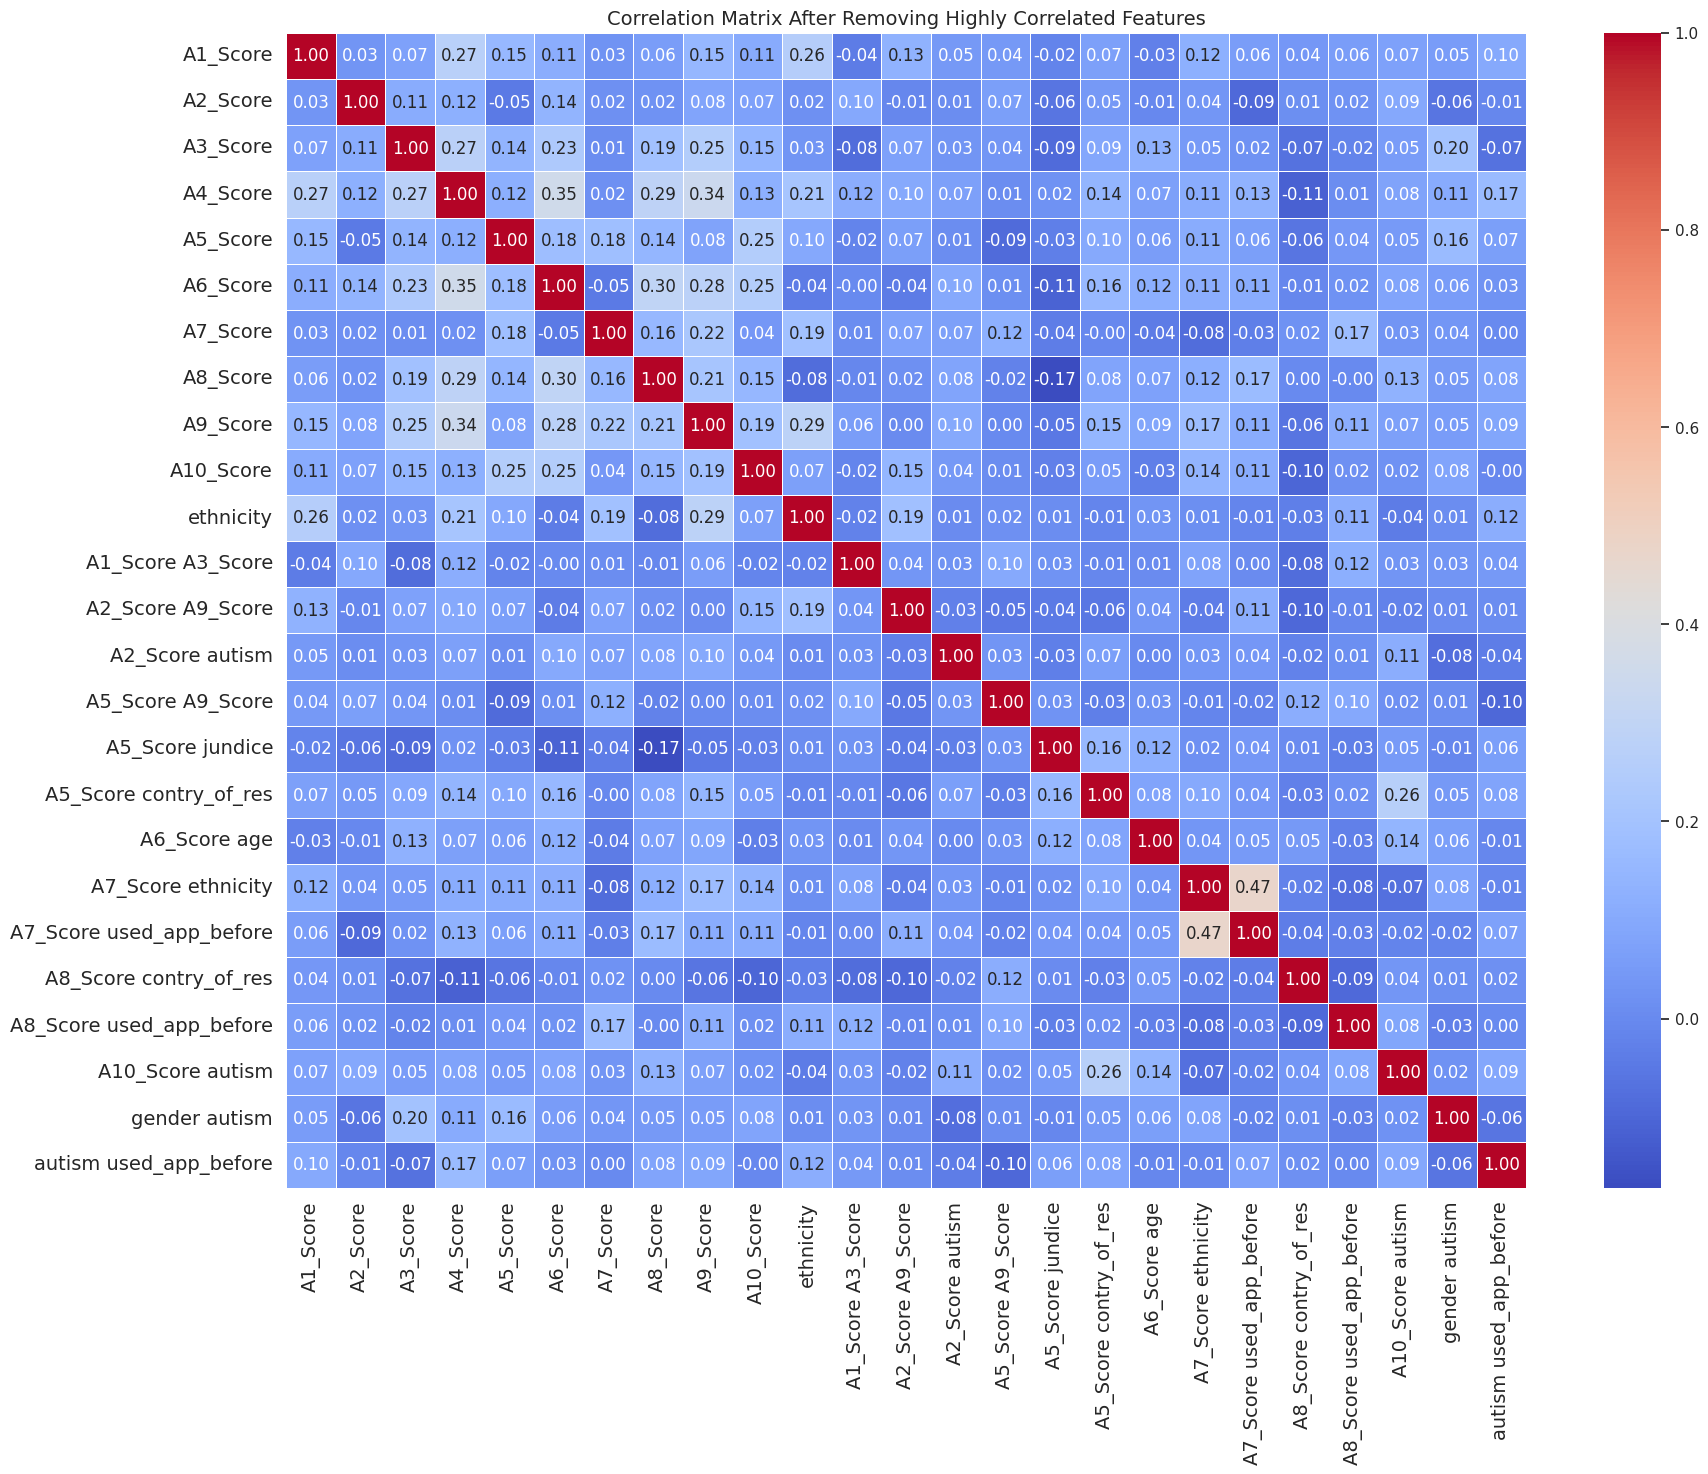

In [ ]:
# Remove highly correlated features
def remove_highly_correlated_features(dataframe, threshold=0.85):
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return dataframe.drop(columns=to_drop)

# Plot the correlation matrix for the reduced dataset
def plot_correlation_matrix(dataframe, title):
    plt.figure(figsize=(20, 15))
    corr_matrix = dataframe.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidth=.7)
    plt.title(title, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig('/content/drive/MyDrive/ASD/Detect_Children/Features_figs/correlation_matrix_after_removing.png')
    plt.show()

# Convert selected features to DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_reduced = remove_highly_correlated_features(X_selected_df)

# Convert reduced data to DataFrame and plot correlation matrix
X_reduced_df = pd.DataFrame(X_reduced, columns=X_reduced.columns)
plot_correlation_matrix(X_reduced_df, 'Correlation Matrix After Removing Highly Correlated Features')

#Split data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y_combined, test_size=0.2, random_state=42)

# Convert to DataFrames
X_train = pd.DataFrame(X_train, columns=X_reduced.columns)
X_test = pd.DataFrame(X_test, columns=X_reduced.columns)
y_train = pd.DataFrame(y_train, columns=['ASD'])
y_test = pd.DataFrame(y_test, columns=['ASD'])

In [ ]:
#save 4 dataframs
X_train_data=X_train.to_csv('/content/drive/MyDrive/ASD/Detect_Children/DataAfterPreprossing/X_train.csv', index=False)
X_test_data=X_test.to_csv('/content/drive/MyDrive/ASD/Detect_Children/DataAfterPreprossing/X_test.csv', index=False)
y_train_data=y_train.to_csv('/content/drive/MyDrive/ASD/Detect_Children/DataAfterPreprossing/y_train.csv', index=False)
y_test_data=y_test.to_csv('/content/drive/MyDrive/ASD/Detect_Children/DataAfterPreprossing/y_test.csv', index=False)

In [ ]:
#load 4 dataframes after preprossing
X_train = pd.read_csv('/content/drive/MyDrive/ASD/Detect_Children/DataAfterPreprossing/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ASD/Detect_Children/DataAfterPreprossing/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/ASD/Detect_Children/DataAfterPreprossing/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ASD/Detect_Children/DataAfterPreprossing/y_test.csv')

In [ ]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

print('y_train shape', y_train.shape)

print('y_test shape', y_test.shape)

X_train shape (467, 25)
X_test shape (117, 25)
y_train shape (467, 1)
y_test shape (117, 1)


#Algorthims


In [ ]:
classifiers = [
    'Random Forest',
    'Gradient Boosting',
    'Extra Trees',
    'Decision Tree',
    'K-Neighbors',
    'MLP'

]
RFc_Classifier=RandomForestClassifier(n_estimators=100)
GBc_Classifier=GradientBoostingClassifier(n_estimators=1000)
ETc_Classifier=ExtraTreesClassifier(n_estimators=100)
DTc_Classifier=DecisionTreeClassifier()
KNc_Classifier=KNeighborsClassifier()
MLP_Classifier=MLPClassifier()


accuracy_results = []
precision_results = []
recall_results = []
f1_results = []
specificity_results = []
logloss_results = []
balanced_acc_results = []
mcc_results = []
kappa_results = []
f2_results = []
hamming_results = []
jaccard_results = []
brier_results = []

#Create model

In [ ]:
def train_(Classifier):
    Classifier.fit(X_train, y_train)
    return Classifier

In [ ]:
RFc_model=train_(RFc_Classifier)
GBc_model=train_(GBc_Classifier)
ETc_model=train_(ETc_Classifier)
DTc_model=train_(DTc_Classifier)
KNc_model=train_(KNc_Classifier)
MLP_model=train_(MLP_Classifier)



#SaveModel

In [ ]:
import pickle

models = {
    'RFc_model': RFc_model,
    'GBc_model': GBc_model,
    'ETc_model': ETc_model,
    'DTc_model': DTc_model,
    'KNc_model': KNc_model,
    'MLP_model': MLP_model

}

for model_name, model in models.items():
    model_filename = f'/content/drive/MyDrive/ASD/Detect_Children/SavedModels/{model_name}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f'{model_name} saved to {model_filename}')

RFc_model saved to /content/drive/MyDrive/ASD/Detect_Children/SavedModels/RFc_model.pkl
GBc_model saved to /content/drive/MyDrive/ASD/Detect_Children/SavedModels/GBc_model.pkl
ETc_model saved to /content/drive/MyDrive/ASD/Detect_Children/SavedModels/ETc_model.pkl
DTc_model saved to /content/drive/MyDrive/ASD/Detect_Children/SavedModels/DTc_model.pkl
KNc_model saved to /content/drive/MyDrive/ASD/Detect_Children/SavedModels/KNc_model.pkl
MLP_model saved to /content/drive/MyDrive/ASD/Detect_Children/SavedModels/MLP_model.pkl


#CrossValidation with cross_val_score

In [ ]:
def cross_val(model):

  # Assuming you want to use 5-fold cross-validation and evaluate accuracy
  cv_scores = cross_val_score(model,X_train, y_train, cv=5, scoring='accuracy')

  print(f'=========={model}==============')

  # Print the cross-validation scores with k value
  for i, score in enumerate(cv_scores):
    print(f"At K = {i+1}:score ={score}")

  # Calculate the average cross-validation score
  average_cv_score = cv_scores.mean()
  print(f"Average cross-validation score:", average_cv_score)


In [ ]:
cross_val(RFc_model)
cross_val(DTc_model)
cross_val(ETc_model)
cross_val(GBc_model)
cross_val(KNc_model)
cross_val(MLP_model)


==========RandomForestClassifier()==============
At K = 1:score =0.9148936170212766
At K = 2:score =0.925531914893617
At K = 3:score =0.989247311827957
At K = 4:score =0.946236559139785
At K = 5:score =0.9032258064516129
Average cross-validation score: 0.9358270418668496
==========DecisionTreeClassifier()==============
At K = 1:score =0.8085106382978723
At K = 2:score =0.8723404255319149
At K = 3:score =0.8924731182795699
At K = 4:score =0.8924731182795699
At K = 5:score =0.8387096774193549
Average cross-validation score: 0.8609013955616565
==========ExtraTreesClassifier()==============
At K = 1:score =0.9148936170212766
At K = 2:score =0.9574468085106383
At K = 3:score =0.989247311827957
At K = 4:score =0.978494623655914
At K = 5:score =0.946236559139785
Average cross-validation score: 0.9572637840311142
==========GradientBoostingClassifier(n_estimators=1000)==============
At K = 1:score =0.9042553191489362
At K = 2:score =0.9468085106382979
At K = 3:score =0.989247311827957
At K = 4:

#CrossValidation with GridSearchCV

In [ ]:

def grid_search(model, param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10,20],
        'min_samples_split': [2, 5, 10]
    }):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f'=========={model}==============')
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    return grid_search.best_estimator_

     # Evaluate the model with the best parameters
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test accuracy:", accuracy)
    return best_model



In [ ]:
grid_search(RFc_model)
grid_search(ETc_model)
grid_search(GBc_model)


==========RandomForestClassifier()==============
Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9485929993136581
==========ExtraTreesClassifier()==============
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9678792038435141
==========GradientBoostingClassifier(n_estimators=1000)==============
Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}
Best score: 0.9359185541066118


GradientBoostingClassifier(max_depth=5, min_samples_split=10, n_estimators=300)

In [ ]:
#Decision Tree classifier
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.8950812171127888
Test accuracy: 0.9230769230769231


In [ ]:
#KNeighborsClassifier
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNeighborsClassifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.9465568519789521
Test accuracy: 1.0


In [ ]:
#MLP classifier
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create an MLP classifier
mlp = MLPClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score: 0.997872340425532
Test accuracy: 1.0
